<a href="https://colab.research.google.com/github/rafaelrafaelfer/Pandas-Data/blob/main/Analisando_os_Dados_do_Airbnb_Para_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [Rafael Ferreira](https://www.linkedin.com/in/rafaelrafaelferreira/)*

---

# Análise dos Dados do Airbnb - *Dublin*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [4]:
# importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline


In [5]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('/content/listings.csv', error_bad_lines=True )

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,50,3,227,2020-02-08,1.88,3,217
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.29885,-6.31850,Private room,30,1,1,2019-05-11,0.04,1,284
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,63,3,182,2020-02-09,2.26,3,312
3,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,38,2,311,2019-12-21,3.58,3,344
4,162809,5.5 miles south of Dublin City :^),777681,Robbie,NaN,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,65,1,284,2020-02-09,3.90,2,286


In [8]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7735,50862522,1 bedroom apartment 8 minute walk from the spire,353715363,Emma,NaN,Dublin City,53.360135,-6.262498,Private room,55,1,0,NaN,NaN,1,364
7736,50865404,Temple Bar & City Hall 1 bed,69683252,Niall And Gavin,NaN,Dublin City,53.344054,-6.267978,Entire home/apt,110,2,0,NaN,NaN,26,90
7737,50872278,Temple Bar City Hall 2 bed,69683252,Niall And Gavin,NaN,Dublin City,53.345441,-6.266123,Entire home/apt,133,3,0,NaN,NaN,26,174
7738,50872867,A traditional Irish Cottage in Dublin,27528616,Alex,NaN,Dn Laoghaire-Rathdown,53.242670,-6.124160,Entire home/apt,300,7,0,NaN,NaN,1,17
7739,50892721,Stylish Townhouse in the Heart of Dublin!,4841913,Rebekah,NaN,Dublin City,53.341109,-6.279870,Entire home/apt,180,3,0,NaN,NaN,1,85


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [7]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}\n'.format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 7740
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.245090
last_review                       0.245090
host_name                         0.042894
name                              0.000129
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

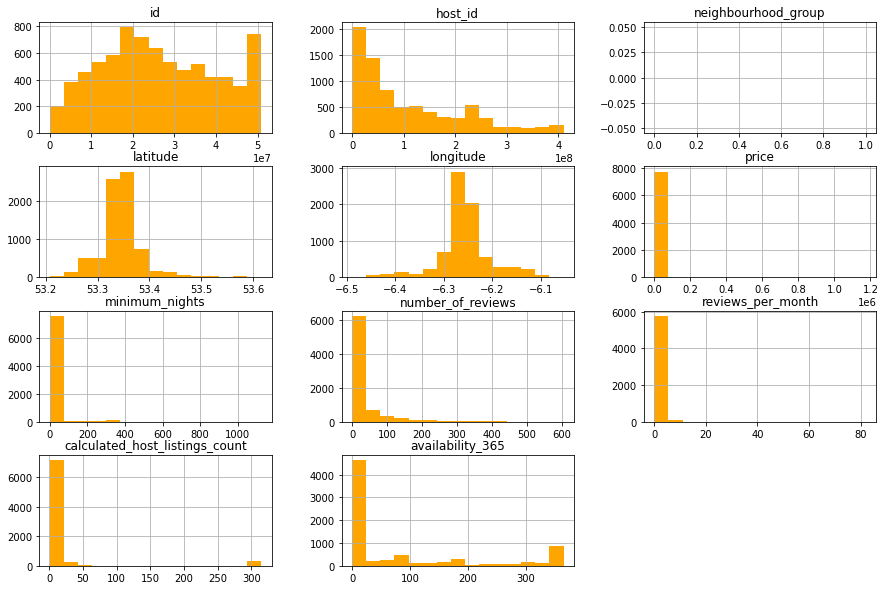

In [13]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10), color='orange');

Através das informações plotadas, constatamos que algumas colunas possuem *outliers*. As colunas referentes são: `price`, `minimum_nights` e `calculated_host_listings_count`.



### **Q4. Qual a média dos preços de aluguel?**

In [16]:
# ver a média da coluna `price``
df[['price']].mean()


price    270.204005
dtype: float64

In [22]:
df[['price']].describe().round(3)

,price
count,7740.000
mean,270.204
std,13341.302
min,0.000
25%,51.000
50%,80.000
75%,133.000
max,1173721.000


### **Remoção de outliers presentes em algumas colunas e remoção da coluna com Not a Number (NaN)**

In [31]:
df_limpo = df.copy()
df_limpo.drop(df_limpo[df_limpo.price > 1200].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights>30].index, axis=0, inplace=True)
df_limpo.drop("neighbourhood_group", axis=1, inplace=True)

### **Q4. Qual a correlação existente entre as variáveis**

In [26]:
# criar uma matriz de correlação
corr = df_limpo[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.043073,-0.028667,-0.033918,-0.092661,0.040994
minimum_nights,0.043073,1.000000,-0.000659,-0.011368,-0.075838,0.023264
number_of_reviews,-0.028667,-0.000659,1.000000,0.624941,-0.090391,0.081420
reviews_per_month,-0.033918,-0.011368,0.624941,1.000000,0.082057,0.154027
calculated_host_listings_count,-0.092661,-0.075838,-0.090391,0.082057,1.000000,0.422267
availability_365,0.040994,0.023264,0.081420,0.154027,0.422267,1.000000


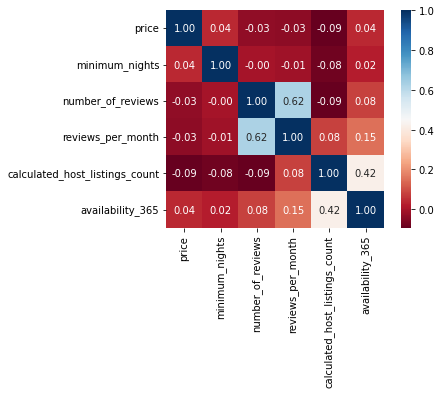

In [27]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [28]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_limpo.room_type.value_counts()

Private room       3809
Entire home/apt    3522
Shared room         145
Hotel room           59
Name: room_type, dtype: int64

In [29]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_limpo.room_type.value_counts()/ df_limpo.shape[0]


Private room       0.505508
Entire home/apt    0.467419
Shared room        0.019244
Hotel room         0.007830
Name: room_type, dtype: float64

In [34]:
# ver a quantidade de imóveis em Dublin City
print(df_limpo[df_limpo.neighbourhood == "Dublin City"].shape)
print(df_limpo[df_limpo.neighbourhood == "Dublin City"])

(5799, 15)
            id  ... availability_365
3       159889  ...              344
5       165828  ...              301
6       165829  ...              289
7       178860  ...               88
8       237465  ...              241
...        ...  ...              ...
7732  50846796  ...              222
7735  50862522  ...              364
7736  50865404  ...               90
7737  50872278  ...              174
7739  50892721  ...               85

[5799 rows x 15 columns]


### **Q6. Qual a localidade mais cara do dataset?**



In [37]:
# ver preços por bairros, na média
df_limpo.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Dublin City              115.320400
Dn Laoghaire-Rathdown    113.638353
Fingal                   100.672131
South Dublin              73.684028
Name: price, dtype: float64

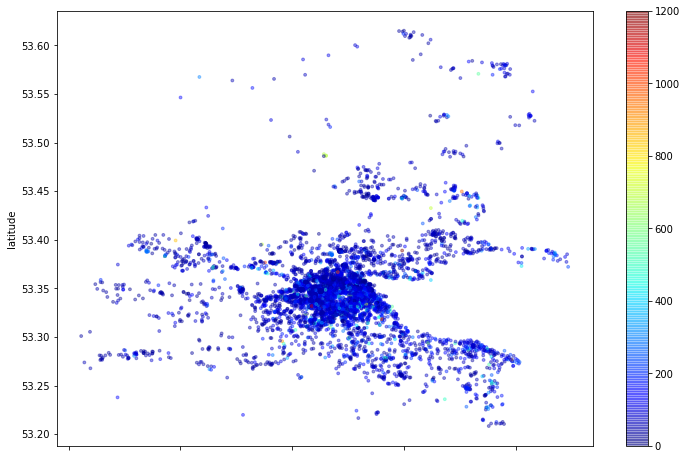

In [39]:
# plotar os imóveis pela latitude-longitude
df_limpo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_limpo['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [51]:
# ver a média da coluna `minimum_nights``
df[['minimum_nights']].mean()


minimum_nights    9.177907
dtype: float64

## Conclusões


Pequenas análises foram feitas e conseguimos constatar que existem dados fora do padrão em algumas colunas. Percebemos também através do gráfico de latitude e longitude e junto a coluna neighbourhood que a concentração de imóveis disponíveis encontra - se em Dublin City centro da cidade e que a média de preços fica abaixo de 200.